In this paper, we take a look at how Sandeep Lamichhane, an emerging spinner has been doing compared to past spinning legends and contemporary spinners.



In [73]:
# Scraping the data from cricinfo
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline

# page = requests.get("http://www.espncricinfo.com/india/content/player/8166.html")
# soup = BeautifulSoup(page.content, 'html.parser')

In [74]:
# All the urls we are extracting from 
urls = ['http://www.espncricinfo.com/england/content/player/244497.html',
        'http://www.espncricinfo.com/ci/content/player/960361.html',
        'http://www.espncricinfo.com/australia/content/player/8166.html',
        'http://www.espncricinfo.com/india/content/player/30176.html',
        'http://www.espncricinfo.com/afghanistan/content/player/793463.html',
        'http://www.espncricinfo.com/india/content/player/430246.html',
        'http://www.espncricinfo.com/india/content/player/31107.html',
        'http://www.espncricinfo.com/australia/content/player/379504.html',
        'http://www.espncricinfo.com/southafrica/content/player/40618.html',]
        
# test_urls = ['http://www.espncricinfo.com/england/content/player/244497.html',
#              'http://www.espncricinfo.com/ci/content/player/960361.html',]

In [75]:
# make a dataframe of the players name
names = []
def player_name():    
    for url in urls:
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')    
        name_div  = soup.find_all('h1')    
        name = name_div[1].get_text().strip()
        names.append(name)

player_name()
#Convert the names array to dataframe
name_df = pd.DataFrame(names)
# rename the column name
name_df.columns = ['Name']

    

In [76]:
player_data = []
def player_record():
    for url in urls:
        data = pd.read_html(url)[1]
        player_data.append(data)
        
player_record()
# concat and conver the player records into a dataframe
df = pd.concat(player_data)
# only pick the T20 data , and drop the rest
t20_df = df[df['Unnamed: 0'] == 'T20s'].reset_index()
# concatenate the name and records columns
final_df = pd.concat([name_df,t20_df], axis = 1)
#drop all unnecessary columns
final_df = final_df.drop(['index', 'Unnamed: 0'], axis=1)  

In [77]:
# Converting balls into overs
overs = []

for balls in final_df.Balls:
    # total overs
    x = math.trunc(balls/6)
    # find the extra balls bowled before the overs were complete
    y = (balls%6) / 10
    overs.append(x+y)
final_df['Overs'] = overs

In [78]:
final_df.head()

,Name,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4w,5w,10,Overs
0,Adil Rashid,164,158.0,3345,4118,186,4/19,4/19,22.13,7.38,17.9,5.0,0,0,557.3
1,Sandeep Lamichhane,42,42.0,902,1076,53,4/10,4/10,20.30,7.15,17.0,1.0,0,0,150.2
2,Shane Warne,73,71.0,1548,1863,70,4/21,4/21,26.61,7.22,22.1,1.0,0,0,258.0
3,Anil Kumble,54,54.0,1245,1389,57,5/5,5/5,24.36,6.69,21.8,2.0,1,0,207.3
4,Rashid Khan,170,169.0,3947,4021,254,5/3,5/3,15.83,6.11,15.5,5.0,2,0,657.5


# Analysis of the data


1. Total number of matches played by all
2. Sort by average and bar graph

# Total Number of Matches played and balls bowled

In [79]:
plt.style.use('seaborn-colorblind')

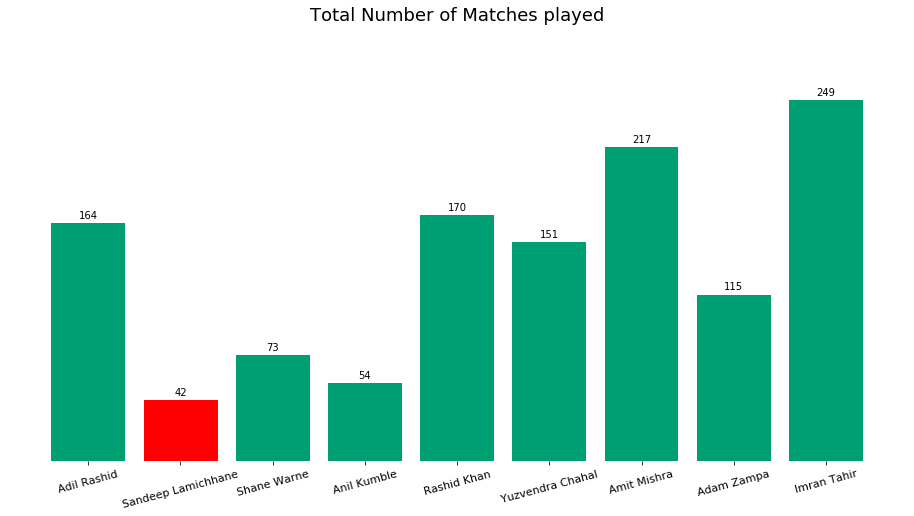

In [80]:

fig, ax = plt.subplots(figsize=(16,8));
matches= ax.bar(final_df.Name,final_df.Mat,color=['C1'])
matches[1].set_color('r')

ax.set_xlabel('');
ax.set_ylabel('Matches Played');
ax.set_ylim([0,300])

ax.set_xticklabels(final_df.Name, rotation=15, fontsize=11);

#add values to respective bar
ha = {'center': 'center', 'right': 'left', 'left': 'right'}
offset = {'center': 0, 'right': 1, 'left': -1}
xpos='center'
for player in matches:
        match = player.get_height()
        ax.annotate(f'{match}',
                    xy=(player.get_x() + player.get_width() / 2, match),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
plt.title("Total Number of Matches played", fontsize=18)

ax.get_yaxis().set_visible(False)
plt.box(False)
plt.savefig("matches_Played.png")

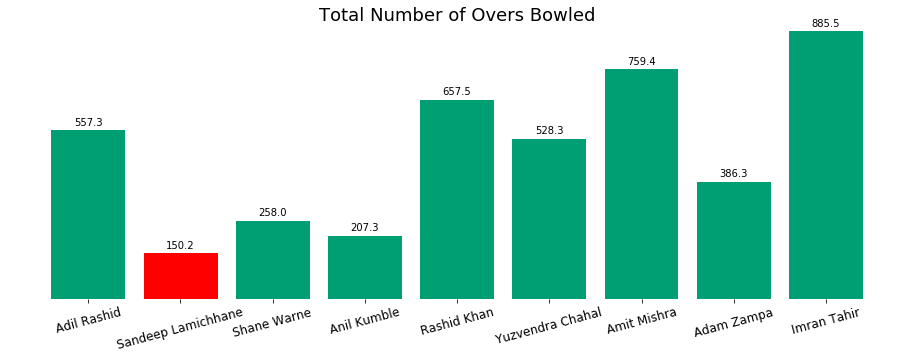

In [81]:
fig, ax = plt.subplots(figsize=(16,5));
matches= ax.bar(final_df.Name,final_df.Overs,color=['C1'])
matches[1].set_color('r')

ax.set_xlabel('');
ax.set_ylabel('Matches Played');
ax.set_ylim([0,900])

ax.set_xticklabels(final_df.Name, rotation=15, fontsize=12);

#add values to respective bar
ha = {'center': 'center', 'right': 'left', 'left': 'right'}
offset = {'center': 0, 'right': 1, 'left': -1}
xpos='center'
for player in matches:
        match = player.get_height()
        ax.annotate(f'{match}',
                    xy=(player.get_x() + player.get_width() / 2, match),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
plt.title("Total Number of Overs Bowled", fontsize=18)

ax.get_yaxis().set_visible(False)
plt.box(False)

In [82]:
# sort by Economy rate
# test = df.sort('one', ascending=False)
df_eco_sort = final_df.sort_values('Econ',ascending= True).reset_index()
df_eco_sort.drop(['index'], axis=1, inplace=True)


In [83]:
df_eco_sort

,Name,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4w,5w,10,Overs
0,Rashid Khan,170,169.0,3947,4021,254,5/3,5/3,15.83,6.11,15.5,5.0,2,0,657.5
1,Anil Kumble,54,54.0,1245,1389,57,5/5,5/5,24.36,6.69,21.8,2.0,1,0,207.3
2,Imran Tahir,249,236.0,5315,6236,303,5/23,5/23,20.58,7.03,17.5,9.0,2,0,885.5
3,Sandeep Lamichhane,42,42.0,902,1076,53,4/10,4/10,20.30,7.15,17.0,1.0,0,0,150.2
4,Amit Mishra,217,216.0,4558,5436,247,5/17,5/17,22.00,7.15,18.4,4.0,2,0,759.4
5,Adam Zampa,115,112.0,2319,2780,127,6/19,6/19,21.88,7.19,18.2,0.0,1,0,386.3
6,Shane Warne,73,71.0,1548,1863,70,4/21,4/21,26.61,7.22,22.1,1.0,0,0,258.0
7,Adil Rashid,164,158.0,3345,4118,186,4/19,4/19,22.13,7.38,17.9,5.0,0,0,557.3
8,Yuzvendra Chahal,151,149.0,3171,3986,172,6/25,6/25,23.17,7.54,18.4,4.0,1,0,528.3


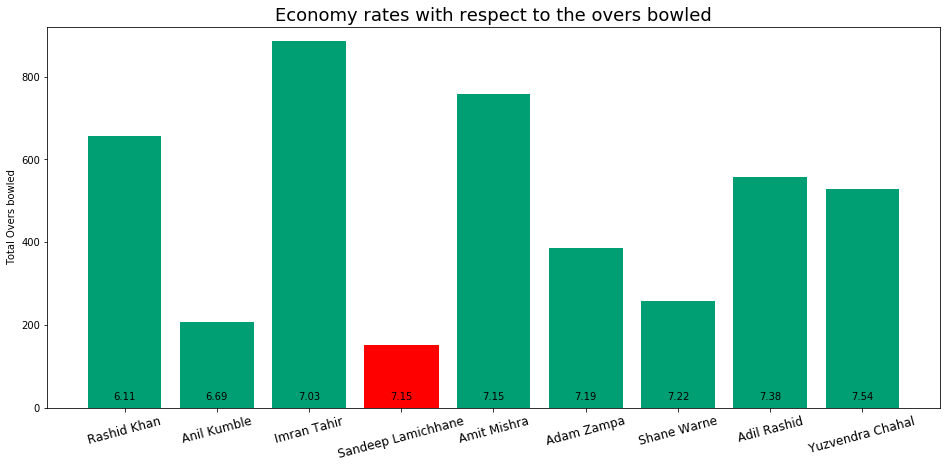

In [84]:
fig, ax = plt.subplots(figsize=(16,7));
economy  = ax.bar(df_eco_sort.Name,df_eco_sort.Econ, color=['grey'])
matches= ax.bar(df_eco_sort.Name,df_eco_sort.Overs,color=['C1'])
matches[3].set_color('r')


ax.set_xlabel('');
ax.set_ylabel('Total Overs bowled');
ax.set_ylim([0,920])
plt.title("Economy rates with respect to the overs bowled", fontsize=18)


ax.set_xticklabels(df_eco_sort.Name, rotation=15, fontsize=12);

#add values to respective bar
ha = {'center': 'center', 'right': 'left', 'left': 'right'}
offset = {'center': 0, 'right': 1, 'left': -1}
xpos='center'

for player in economy:
        match = player.get_height()
        ax.annotate(f'{match}',
                    xy=(player.get_x() + player.get_width() / 2, match),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


# ax.get_yaxis().set_visible(False)
# plt.box(False)

# Sorting by combined bowling rate as suggested by Lemmar

Combined Bowling Rate(CBR) = 3R/(W + O + W * (R/B))

Where R is Total runs conceded
W - Total wickets taken
O - Number of overs bowled

In [85]:
df_eco_sort['Overs'] = (df_eco_sort.Balls/6).round(0)

In [86]:
#using THE CBR forumla 
numerator = (3 * df_eco_sort['Runs'])

In [87]:
denom = (df_eco_sort.Wkts + df_eco_sort.Overs +(df_eco_sort.Wkts * (df_eco_sort.Runs/df_eco_sort.Balls))) 

In [88]:
df_eco_sort['CBR'] = (numerator/denom).round(2)

In [89]:
df_cbr = df_eco_sort.sort_values('CBR',ascending= True).reset_index()

In [90]:
df_cbr

,index,Name,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4w,5w,10,Overs,CBR
0,0,Rashid Khan,170,169.0,3947,4021,254,5/3,5/3,15.83,6.11,15.5,5.0,2,0,658.0,10.30
1,2,Imran Tahir,249,236.0,5315,6236,303,5/23,5/23,20.58,7.03,17.5,9.0,2,0,886.0,12.11
2,3,Sandeep Lamichhane,42,42.0,902,1076,53,4/10,4/10,20.30,7.15,17.0,1.0,0,0,150.0,12.13
3,4,Amit Mishra,217,216.0,4558,5436,247,5/17,5/17,22.00,7.15,18.4,4.0,2,0,760.0,12.53
4,5,Adam Zampa,115,112.0,2319,2780,127,6/19,6/19,21.88,7.19,18.2,0.0,1,0,386.0,12.54
5,1,Anil Kumble,54,54.0,1245,1389,57,5/5,5/5,24.36,6.69,21.8,2.0,1,0,208.0,12.68
6,7,Adil Rashid,164,158.0,3345,4118,186,4/19,4/19,22.13,7.38,17.9,5.0,0,0,558.0,12.70
7,8,Yuzvendra Chahal,151,149.0,3171,3986,172,6/25,6/25,23.17,7.54,18.4,4.0,1,0,528.0,13.05
8,6,Shane Warne,73,71.0,1548,1863,70,4/21,4/21,26.61,7.22,22.1,1.0,0,0,258.0,13.56


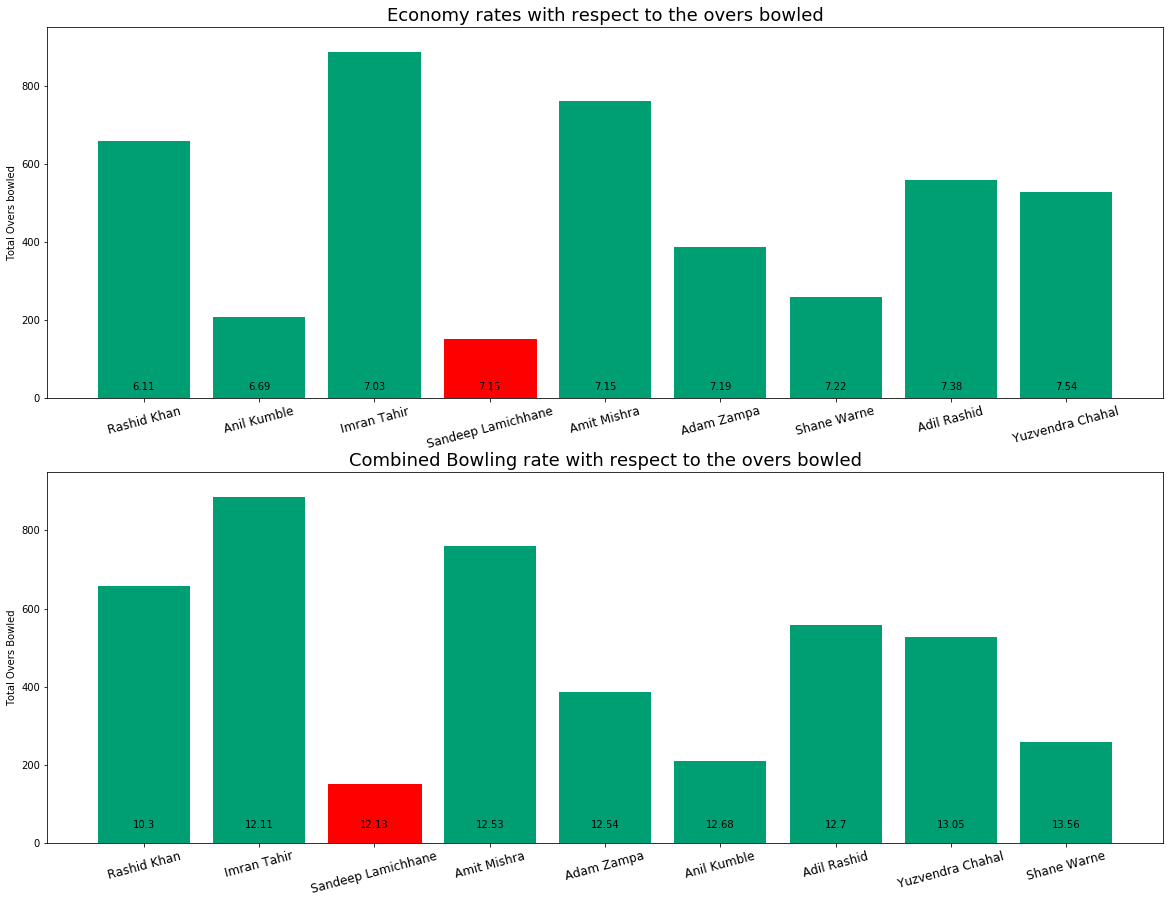

In [93]:

fig, axs = plt.subplots(2,1,figsize=(20,15));

economy  = axs[0].bar(df_eco_sort.Name,df_eco_sort.Econ, color=['grey'])
matches= axs[0].bar(df_eco_sort.Name,df_eco_sort.Overs,color=['C1'])
matches[3].set_color('r')

axs[0].set_xlabel('');
axs[0].set_ylabel('Total Overs bowled');
axs[0].set_ylim([0,950])
axs[0].set_title("Economy rates with respect to the overs bowled", fontsize=18)


axs[0].set_xticklabels(df_eco_sort.Name, rotation=15, fontsize=12);

#add values to respective bar
ha = {'center': 'center', 'right': 'left', 'left': 'right'}
offset = {'center': 0, 'right': 1, 'left': -1}
xpos='center'

for player in economy:
        match = player.get_height()
        axs[0].annotate(f'{match}',
                    xy=(player.get_x() + player.get_width() / 2, match),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')




#####

# CBR = ax.bar(df_cbr.Name,df_cbr.CBR, alpha = 0)
matches= axs[1].bar(df_cbr.Name,df_cbr.Overs,color=['C1'])
matches[2].set_color('r')

axs[1].set_xlabel('');
axs[1].set_ylabel('Total Overs Bowled');
axs[1].set_ylim([0,950])
axs[1].set_title("Combined Bowling rate with respect to the overs bowled", fontsize=18)

axs[1].set_xticklabels(df_cbr.Name, rotation=15, fontsize=12);

#add values to respective bar
ha = {'center': 'center', 'right': 'left', 'left': 'right'}
offset = {'center': 0, 'right': 1, 'left': -1}
xpos='center'
for player in CBR:
        econ = player.get_height()
        axs[1].annotate(f'{econ}',
                    xy=(player.get_x() + player.get_width() / 2, match),
                    xytext=(offset[xpos]*3, 10),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

axs[1].get_yaxis().set_visible(True)
# fig.tight_layout()
plt.box(True)
plt.savefig('cbr.jpg')

In [115]:
df_1 = df_cbr[['Name','Overs']]

In [116]:
df_1

,Name,Overs
0,Rashid Khan,658.0
1,Imran Tahir,886.0
2,Sandeep Lamichhane,150.0
3,Amit Mishra,760.0
4,Adam Zampa,386.0
5,Anil Kumble,208.0
6,Adil Rashid,558.0
7,Yuzvendra Chahal,528.0
8,Shane Warne,258.0
